0.8472

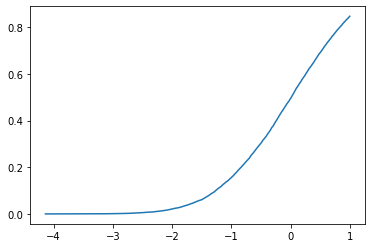

0.9426

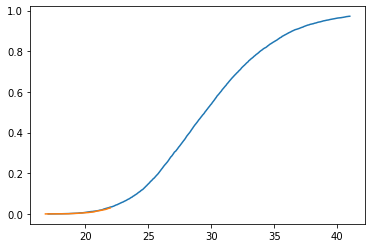

In [46]:
#Ex 3
#1. InverseGamma(38,1110)

sigma_2 = pyro.distributions.InverseGamma(38,1110)
diff = cdf(sigma_2,41) - cdf(sigma_2,22)
diff


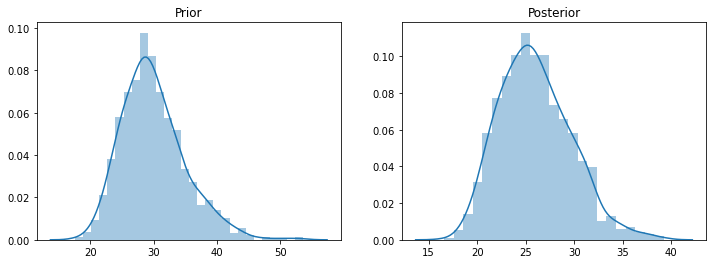

In [19]:
#2: #TODO
#We know that the inverse gamma is the conjugate prior for the normal distribution with known mean and unknown variance. then we know the posterior analitically
import pyro.distributions as dist
data = [183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186]
alfa = 38 + len(data)

num = 0
for i in data:
    num += (i-180)**2
    
beta = 1110 + num/2
prior_sigma_samples = [pyro.sample("prior", dist.InverseGamma(38,1110)) for i in range(1000)]
post_sigma_samples = [pyro.sample("post", dist.InverseGamma(alfa,beta)) for i in range(1000)]

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(prior_sigma_samples, ax=axes[0])
sns.distplot(post_sigma_samples, ax=axes[1])
axes[0].set_title('Prior')
axes[1].set_title('Posterior')
plt.show()

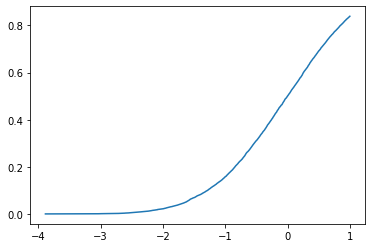

In [25]:
help(np.argwhere)

Help on function argwhere in module numpy:

argwhere(a)
    Find the indices of array elements that are non-zero, grouped by element.
    
    Parameters
    ----------
    a : array_like
        Input data.
    
    Returns
    -------
    index_array : (N, a.ndim) ndarray
        Indices of elements that are non-zero. Indices are grouped by element.
        This array will have shape ``(N, a.ndim)`` where ``N`` is the number of
        non-zero items.
    
    See Also
    --------
    where, nonzero
    
    Notes
    -----
    ``np.argwhere(a)`` is almost the same as ``np.transpose(np.nonzero(a))``,
    but produces a result of the correct shape for a 0D array.
    
    The output of ``argwhere`` is not suitable for indexing arrays.
    For this purpose use ``nonzero(a)`` instead.
    
    Examples
    --------
    >>> x = np.arange(6).reshape(2,3)
    >>> x
    array([[0, 1, 2],
           [3, 4, 5]])
    >>> np.argwhere(x>1)
    array([[0, 2],
           [1, 0],
           [1, 1]